# Imports et récupération des données

In [1]:
# pip install ucimlrepo

In [2]:
# OS
import sys


# WARNINGS
import warnings

from sklearn.ensemble import AdaBoostClassifier

warnings.filterwarnings('ignore')
warnings.filterwarnings('error', category=DeprecationWarning)

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight') 

params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (10, 8)}
plt.rcParams.update(params)


# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN 
import seaborn as sns
# sns.set_context("poster")
# sns.set_style("ticks")

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # Normalisation MinMax
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model # Classe Modèle linéaire 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier


# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # Validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation: visualiser les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyperparamètres
from sklearn.model_selection import RandomizedSearchCV # Tester plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage: visualisation des scores du train et du validation sets en fonction des quantités des données
 
## EVALUATION

from sklearn.metrics import r2_score, accuracy_score  # Coefficient R2
from sklearn.metrics import mean_absolute_error #  MAE
from sklearn.metrics import mean_squared_error  # RMSE
from sklearn.metrics import median_absolute_error # Erreur de la médiane absolue

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEUR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# SOURCE DATA
from ucimlrepo import fetch_ucirepo 

# Sources personnalisées
from AED_utils import encoder_var_ordinale

In [3]:
data_adult = fetch_ucirepo(id=2) 

# Analyse Exploratoire des Données

Pour réaliser l'AED, nous utilisons les données des fichiers téléchargés depuis le site web.

In [4]:
df_adult_train = pd.read_csv("./data/adult.data", names=data_adult.variables['name'], header=None)
df_adult_test = pd.read_csv("./data/adult.test", names=data_adult.variables['name'], header=0)
df_entire_adult = pd.concat([df_adult_train, df_adult_test], axis=0)

In [5]:
isinstance(df_adult_train, pd.DataFrame) # vérification du format Dataframe

True

In [6]:
df_adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [8]:
df_entire_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df_adult_train.shape

(32561, 15)

In [10]:
df_adult_test.shape

(16280, 15)

In [11]:
df_adult_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
df_adult_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
df_adult_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df_adult_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16280.000000,1.628000e+04,16280.000000,16280.00000,16280.000000,16280.000000
mean,38.768305,1.894334e+05,10.073096,1081.97156,87.904668,40.392260
std,13.849192,1.057177e+05,2.567511,7584.16416,403.117078,12.479715
min,17.000000,1.349200e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.167162e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.778295e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,3770.000000,99.000000


In [15]:
df_adult_train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
df_adult_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [17]:
df_adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df_adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  native-country  16280 non-null  object
 14  income          16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Problème : La description des données indique qu'elles contiennent des valeurs inconnues. Ces valeurs ne sont pas en NaN ou null. Nous pouvons déjà remarquer la présence de '?' en leur lieu et place.

Nous remplaçons les '?' par des NaN afin de pouvoir d'évaluer la quantité de données manquantes et effectuer l'AED au plus proche de la réalité.

In [19]:
df_adult_train = df_adult_train.replace('\?', np.nan, regex=True)
df_adult_test = df_adult_test.replace('\?', np.nan, regex=True)
df_entire_adult = df_entire_adult.replace('\?', np.nan, regex=True)

In [20]:
df_adult_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
df_adult_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16280.000000,1.628000e+04,16280.000000,16280.00000,16280.000000,16280.000000
mean,38.768305,1.894334e+05,10.073096,1081.97156,87.904668,40.392260
std,13.849192,1.057177e+05,2.567511,7584.16416,403.117078,12.479715
min,17.000000,1.349200e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.167162e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.778295e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,3770.000000,99.000000


In [22]:
df_adult_train.isna().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

<Axes: >

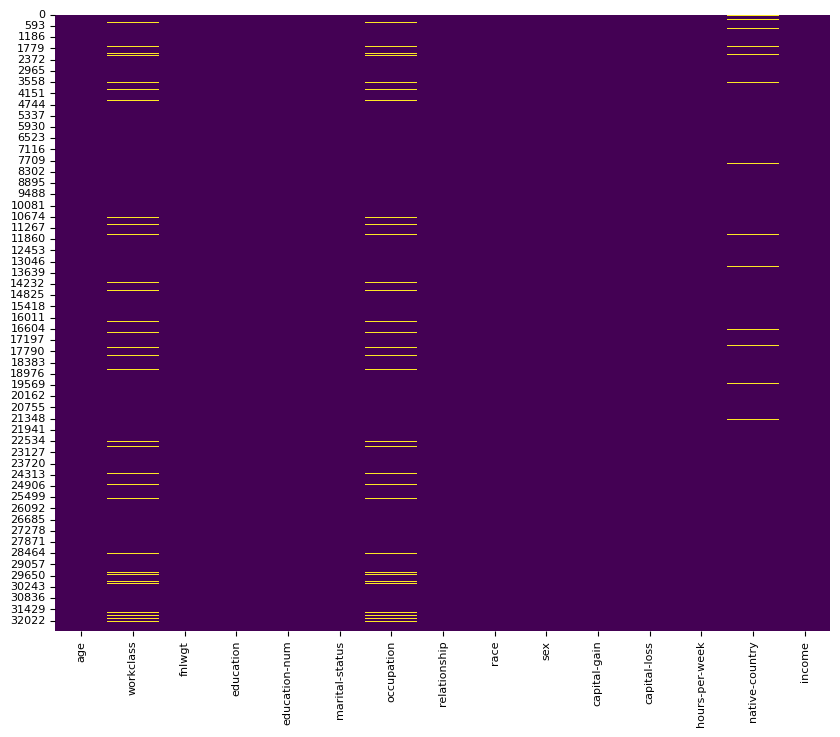

In [23]:
plt.rcParams['text.usetex'] = False
sns.heatmap(df_adult_train.isna(), cbar=False, cmap='viridis')

In [24]:
df_adult_test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

<Axes: >

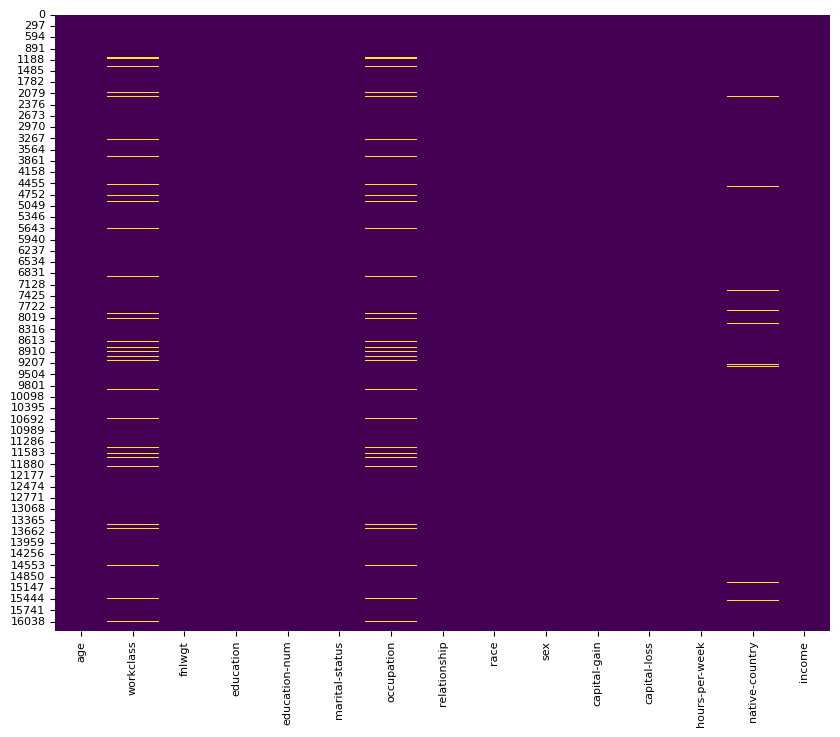

In [25]:
sns.heatmap(df_adult_test.isna(), cbar=False, cmap='viridis')

In [26]:
df_entire_adult.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

<Axes: >

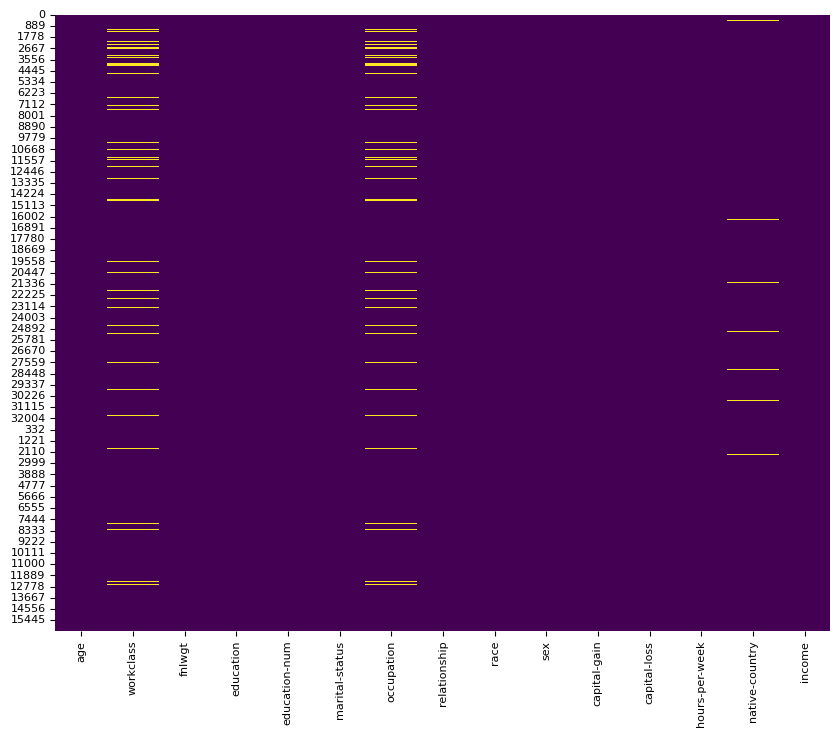

In [27]:
sns.heatmap(df_entire_adult.isna(), cbar=False, cmap='viridis')

In [28]:
print("Part de valeurs manquantes pour 'workclass' : ", df_entire_adult.isna().sum()['workclass'] / df_entire_adult.shape[0])
print("Part de valeurs manquantes pour 'occupation' : ", df_entire_adult.isna().sum()['occupation'] / df_entire_adult.shape[0])
print("Part de valeurs manquantes pour 'native-country' : ", df_entire_adult.isna().sum()['native-country'] / df_entire_adult.shape[0])

Part de valeurs manquantes pour 'workclass' :  0.05730840891873631
Part de valeurs manquantes pour 'occupation' :  0.057513154931307715
Part de valeurs manquantes pour 'native-country' :  0.017546733277369424


Nous observons que les données manquantes se situent dans les variables `workclass`, `occupation` et `native-country`. Celles-ci correspondent aux variables pour lesquelles `Missing values` est à `True` sur le site descriptif du jeu de données.

Ces trois variables ont moins de 6% de données manquantes alors nous choisissons de toutes les conserver.

### Duplicatas

In [29]:
df_adult_test = df_adult_test.replace('<=50K.', '<=50K', regex=True)
df_adult_test = df_adult_test.replace('>50K.', '>50K', regex=True)
df_entire_adult = df_entire_adult.replace('<=50K.', '<=50K', regex=True)
df_entire_adult = df_entire_adult.replace('>50K.', '>50K', regex=True)
df_adult_train[df_adult_train.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [30]:
df_adult_test[df_adult_test.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
863,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11188,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11211,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13847,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15959,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K


In [31]:
df_entire_adult[df_entire_adult.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [32]:
df_adult_test = df_adult_test.drop_duplicates()
df_adult_test[df_adult_test.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [33]:
df_adult_train = df_adult_train.drop_duplicates()
df_adult_train[df_adult_train.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [34]:
df_entire_adult = df_entire_adult.drop_duplicates()
df_entire_adult[df_entire_adult.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


Nous observons que des personnes ont des profils exactement les mêmes. Des lignes sont dupliquées (sans considérer le `name` qui est comme un identifiant de ligne). Nous avons supprimé les données dupliquées.

In [35]:
df_adult_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [36]:
df_adult_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16275 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16275 non-null  int64 
 1   workclass       15312 non-null  object
 2   fnlwgt          16275 non-null  int64 
 3   education       16275 non-null  object
 4   education-num   16275 non-null  int64 
 5   marital-status  16275 non-null  object
 6   occupation      15309 non-null  object
 7   relationship    16275 non-null  object
 8   race            16275 non-null  object
 9   sex             16275 non-null  object
 10  capital-gain    16275 non-null  int64 
 11  capital-loss    16275 non-null  int64 
 12  hours-per-week  16275 non-null  int64 
 13  native-country  16001 non-null  object
 14  income          16275 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [37]:
df_entire_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48789 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48789 non-null  int64 
 1   workclass       45994 non-null  object
 2   fnlwgt          48789 non-null  int64 
 3   education       48789 non-null  object
 4   education-num   48789 non-null  int64 
 5   marital-status  48789 non-null  object
 6   occupation      45984 non-null  object
 7   relationship    48789 non-null  object
 8   race            48789 non-null  object
 9   sex             48789 non-null  object
 10  capital-gain    48789 non-null  int64 
 11  capital-loss    48789 non-null  int64 
 12  hours-per-week  48789 non-null  int64 
 13  native-country  47933 non-null  object
 14  income          48789 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [38]:
df_entire_adult.shape

(48789, 15)

In [39]:
df_adult_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [40]:
df_adult_train.dtypes.value_counts()

object    9
int64     6
Name: count, dtype: int64

## Variables
- **age** : l'âge d'un individu (quantitative continue, ici un entier supérieur à 0)
- **workclass** : le statut d'emploi de l'individu (qualitative nominale), 
    - [Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked]
- **fnlwgt** : veut dire `final weight`, le nombre de personne que l'organisation pense que l'instance représente. (quantitative discrète)
- **education** : le niveau d'éducation de l'individu. (qualitative ordinale mais l'ordre n'est pas forcément évident)
    - [Bachelors, Some college, 11th, HS grad, Prof school, Assoc acdm, Assoc voc, 9th, 7th, 8th, 12th, Masters, 1st, 4th, 10th, Doctorate, 5th 6th, Preschool]
- **education-num** : le niveau d'éducation dans sa forme numérique. (qualitative ordinale, un entier supérieur à 0)
- **marital-status** : le statut marital de l'individu. (qualitative nominale)
    - [Married civ spouse, Divorced, Never married, Separated, Widowed, Married spouse absent, Married AF spouse]
        - Married civ spouse corresponds to a civilian spouse while Married AF spouse is a spouse in the Armed Forces.
- **occupation** : le type général de métier de l'individu. (qualitative nominale)
    - [Tech support, Craft repair, Other service, Sales, Exec managerial, Prof specialty, Handlers cleaners, Machine op inspct, Adm clerical,Farming fishing, Transport moving, Priv house serv, Protective serv, Armed Forces]
- **relationship** : ce que l'individu est par rapport à d'autre. (qualitative nominale)
    - [Wife, Own child, Husband, Not in family, Other relative, Unmarried]
- **race** : l'ethnie de l'individu. (qualitative nominale)
    - [White, Asian Pac Islander, Amer Indian Eskimo, Other, Black]
- **sex** : sexe de l'individu. (qualitative nominale on peut la transformer en variable binaire car il n'y a que deux choix, "0" pour Female et "1" pour Male)
    - [Male, Female]
- **capital-gain** : les gains de l'individu. (quantitative discrète, un entier supérieur ou égal à 0)
- **capital-loss** : les pertes de l'individu. (quantitative discrète, un entier supérieur ou égal à 0)
- **hours-per-week** : le nombre d'heures de travail par semaine rapporté par l'individu. (quantitative continue)
- **native-country** : le pays de naissance de l'individu. (qualitative nominale)
    - [United States, Cambodia, England, Puerto Rico, Canada, Germany, Outlying US(Guam USVI etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinadad&Tobago, Peru, Hong, Holand Netherlands]
- **income** (variable cible) : si l'individu gagne ou non plus de $50,000 par an. (qualitative nominale, peut être transformée en binaire, "0" pour <=50k et "1" pour >50k)
    - [<=50k, >50k]

On encode les variable qualitatives ordinales.

In [41]:
adult_colonnes_ordinales = ["sex", "income"]

df_adult_train_enco = encoder_var_ordinale(df_adult_train, adult_colonnes_ordinales)
df_adult_test_enco = encoder_var_ordinale(df_adult_test, adult_colonnes_ordinales)
df_entire_adult_enco = encoder_var_ordinale(df_entire_adult, adult_colonnes_ordinales)

In [42]:
df_entire_adult_enco.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [43]:
df_entire_adult_enco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48789 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48789 non-null  int64 
 1   workclass       45994 non-null  object
 2   fnlwgt          48789 non-null  int64 
 3   education       48789 non-null  object
 4   education-num   48789 non-null  int64 
 5   marital-status  48789 non-null  object
 6   occupation      45984 non-null  object
 7   relationship    48789 non-null  object
 8   race            48789 non-null  object
 9   sex             48789 non-null  int64 
 10  capital-gain    48789 non-null  int64 
 11  capital-loss    48789 non-null  int64 
 12  hours-per-week  48789 non-null  int64 
 13  native-country  47933 non-null  object
 14  income          48789 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 6.0+ MB


In [44]:
df_adult_train = df_adult_train_enco
df_adult_test = df_adult_test_enco
df_entire_adult = df_entire_adult_enco

## Variable cible

In [45]:
df_adult_train['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [46]:
df_adult_test['income'].value_counts()

income
0    12429
1     3846
Name: count, dtype: int64

In [47]:
df_entire_adult['income'].value_counts()

income
0    37108
1    11681
Name: count, dtype: int64

In [48]:
less = df_adult_train['income'].value_counts()[0] + df_adult_test['income'].value_counts()[0] # plus de 50K
more = df_adult_train['income'].value_counts()[1] + df_adult_test['income'].value_counts()[1] # moins ou égal à 50K
total = df_adult_train['income'].value_counts()[0] + df_adult_test['income'].value_counts()[0] + df_adult_train['income'].value_counts()[1] + df_adult_test['income'].value_counts()[1]
print(less, more, total)
print(df_adult_train['income'].value_counts()[0] / (df_adult_train['income'].value_counts()[0] + df_adult_train['income'].value_counts()[1]))
print(df_adult_train['income'].value_counts()[1] / (df_adult_train['income'].value_counts()[0] + df_adult_train['income'].value_counts()[1]))
print(df_adult_test['income'].value_counts()[0] / (df_adult_test['income'].value_counts()[0] + df_adult_test['income'].value_counts()[1]))
print(df_adult_test['income'].value_counts()[1] / (df_adult_test['income'].value_counts()[0] + df_adult_test['income'].value_counts()[1]))
print(less / total)
print(more / total)

37127 11685 48812
0.7590742846605403
0.2409257153394597
0.7636866359447004
0.23631336405529954
0.7606121445546177
0.23938785544538227


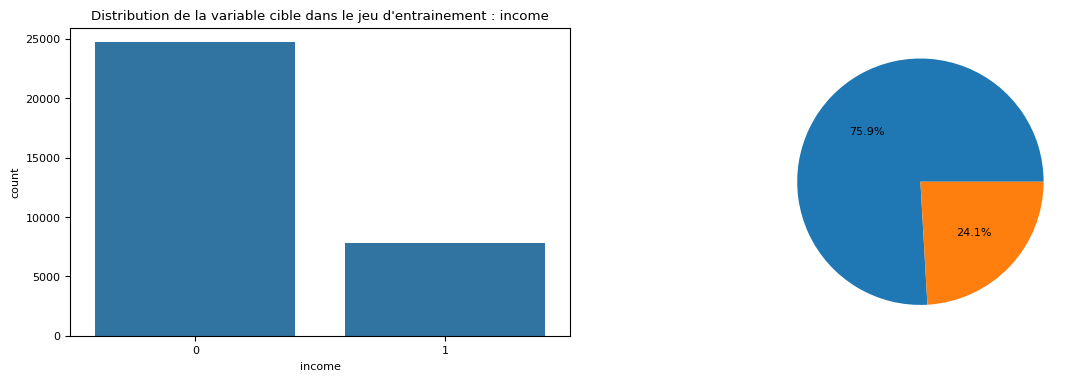

In [49]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='income', data=df_adult_train)
plt.title("Distribution de la variable cible dans le jeu d'entrainement : income")
plt.subplot(122)
plt.pie(df_adult_train['income'].value_counts(), autopct='%1.1f%%')
plt.show()

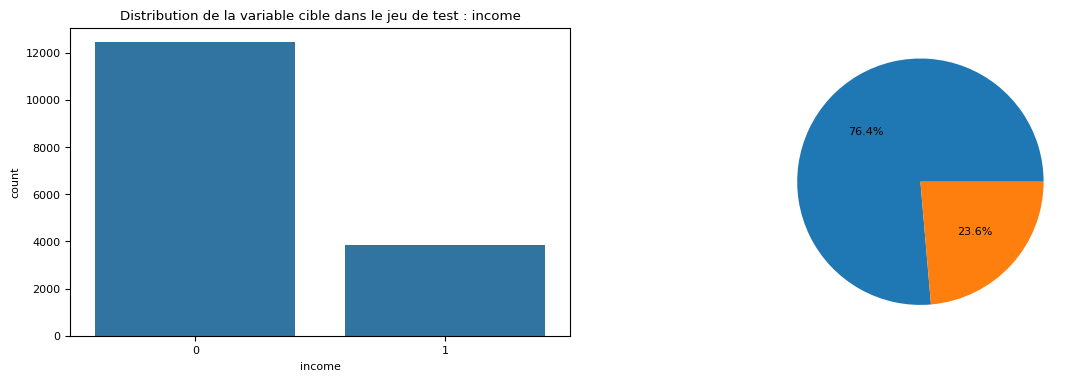

In [50]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='income', data=df_adult_test)
plt.title("Distribution de la variable cible dans le jeu de test : income")
plt.subplot(122)
plt.pie(df_adult_test['income'].value_counts(), autopct='%1.1f%%')
plt.show()

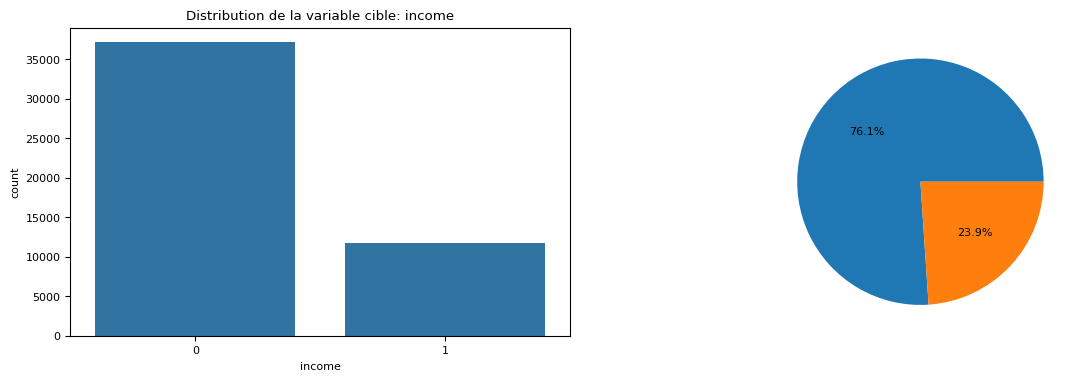

In [51]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='income', data=df_entire_adult)
plt.title("Distribution de la variable cible: income")
plt.subplot(122)
plt.pie(df_entire_adult['income'].value_counts(), autopct='%1.1f%%')
plt.show()

## Analyse univariée
### Variables catégorielles
Nous remarquons que les variable `education`et `education-num` représentent la même information qualitative. Nous vérifions qu'`education-num` est bien ordonnée.

In [52]:
tmp_df=df_entire_adult.drop_duplicates(['education','education-num'])[['education','education-num']]
print(tmp_df.sort_values('education-num', ascending=True))

         education  education-num
224      Preschool              1
160        1st-4th              2
56         5th-6th              3
15         7th-8th              4
6              9th              5
77            10th              6
3             11th              7
415           12th              8
2          HS-grad              9
10    Some-college             10
14       Assoc-voc             11
13      Assoc-acdm             12
0        Bachelors             13
5          Masters             14
52     Prof-school             15
20       Doctorate             16


Nous pouvons donc supprimer la variable `education`.

In [ ]:
df_entire_adult.drop(columns=['education'])

In [ ]:
df_entire_adult.head()

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

Les variables catégorielles sont : 
- workclass
- education-num
- marital-status
- occupation
- relationship
- race
- sex
- native-country

In [ ]:
df_entire_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
